In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import os

#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Copying data to another dataframe df_train for our convenience so that original dataframe remains intact
df_train = data.copy()
df_train.rename(columns ={'price':'SalePrice'},inplace=True)

### Step-2 : Data Cleaning and Pre processing

In [5]:
print(len(data))
#Check the number of features in the data set
print(len(data.columns))
#Check the data types of each column
print(data.dtypes)

21613
21
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [6]:
#Check any number of columns with NaN or missing values
print(data.isnull().any().sum(),'/',len(data.columns))

0 / 21


In [7]:
#Check any number of data points with NaN
print(data.isnull().any(axis=1).sum(),'/',len(data))

0 / 21613


### Step-3: Finding Correlation

In [8]:
#As id and data columns are not important to predict price so discard it
features = data.iloc[:,3:].columns.tolist()
target = data.iloc[:,2].name

In [9]:
#Finding correlation of price with other variables to see correlation
from scipy.stats import pearsonr
correlation ={}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f+ ' vs ' + target
    correlation[key] = pearsonr(x1,x2)[0]

In [10]:
#Printing all the correlated features value with respect to price which is target variable
data_correlations = pd.DataFrame(correlation,index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


### Step-4 EDA

<Axes: xlabel='sqft_living15', ylabel='price'>

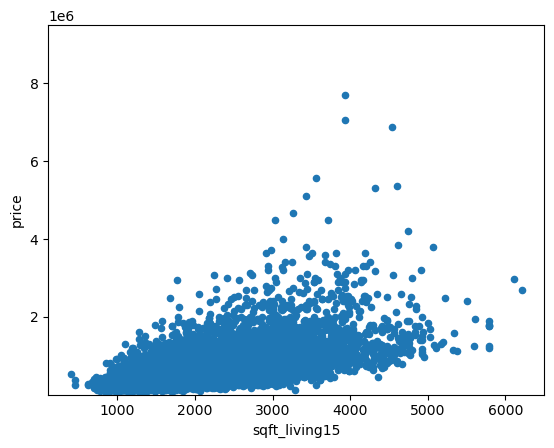

In [11]:
var = 'sqft_living15'
data = pd.concat([data['price'],data[var]],axis=1)
data.plot.scatter(x=var,y='price',ylim=(3,9500000))

(-0.5, 12.5, 0.0, 4000000.0)

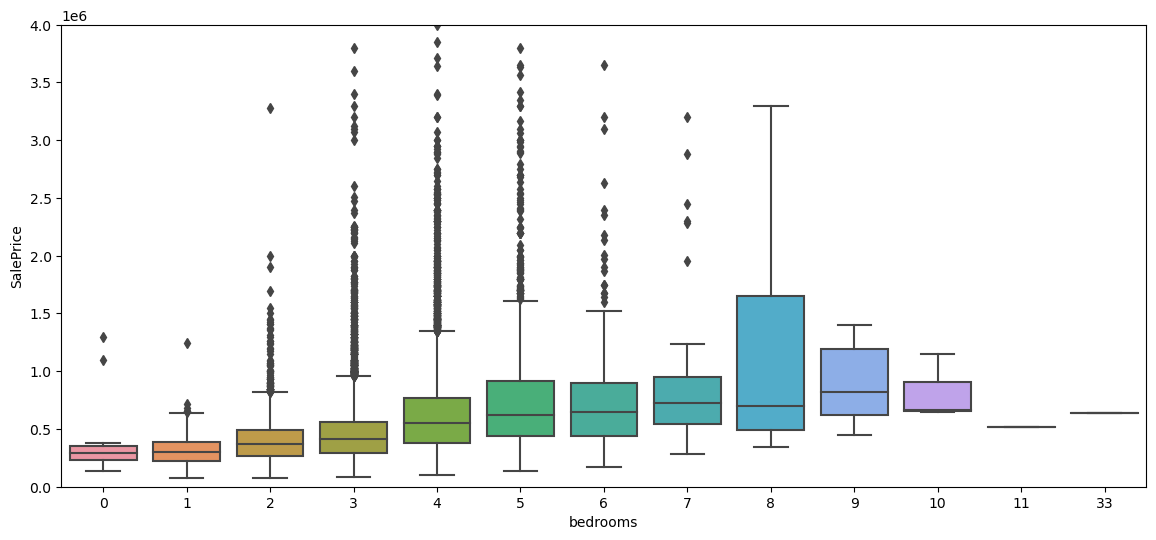

In [12]:
var = 'bedrooms'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f,ax = plt.subplots(figsize=(14,6))
fig = sns.boxplot(x=var,y ='SalePrice',data=data)
fig.axis(ymin=0,ymax=4000000)

(-0.5, 29.5, 0.0, 3500000.0)

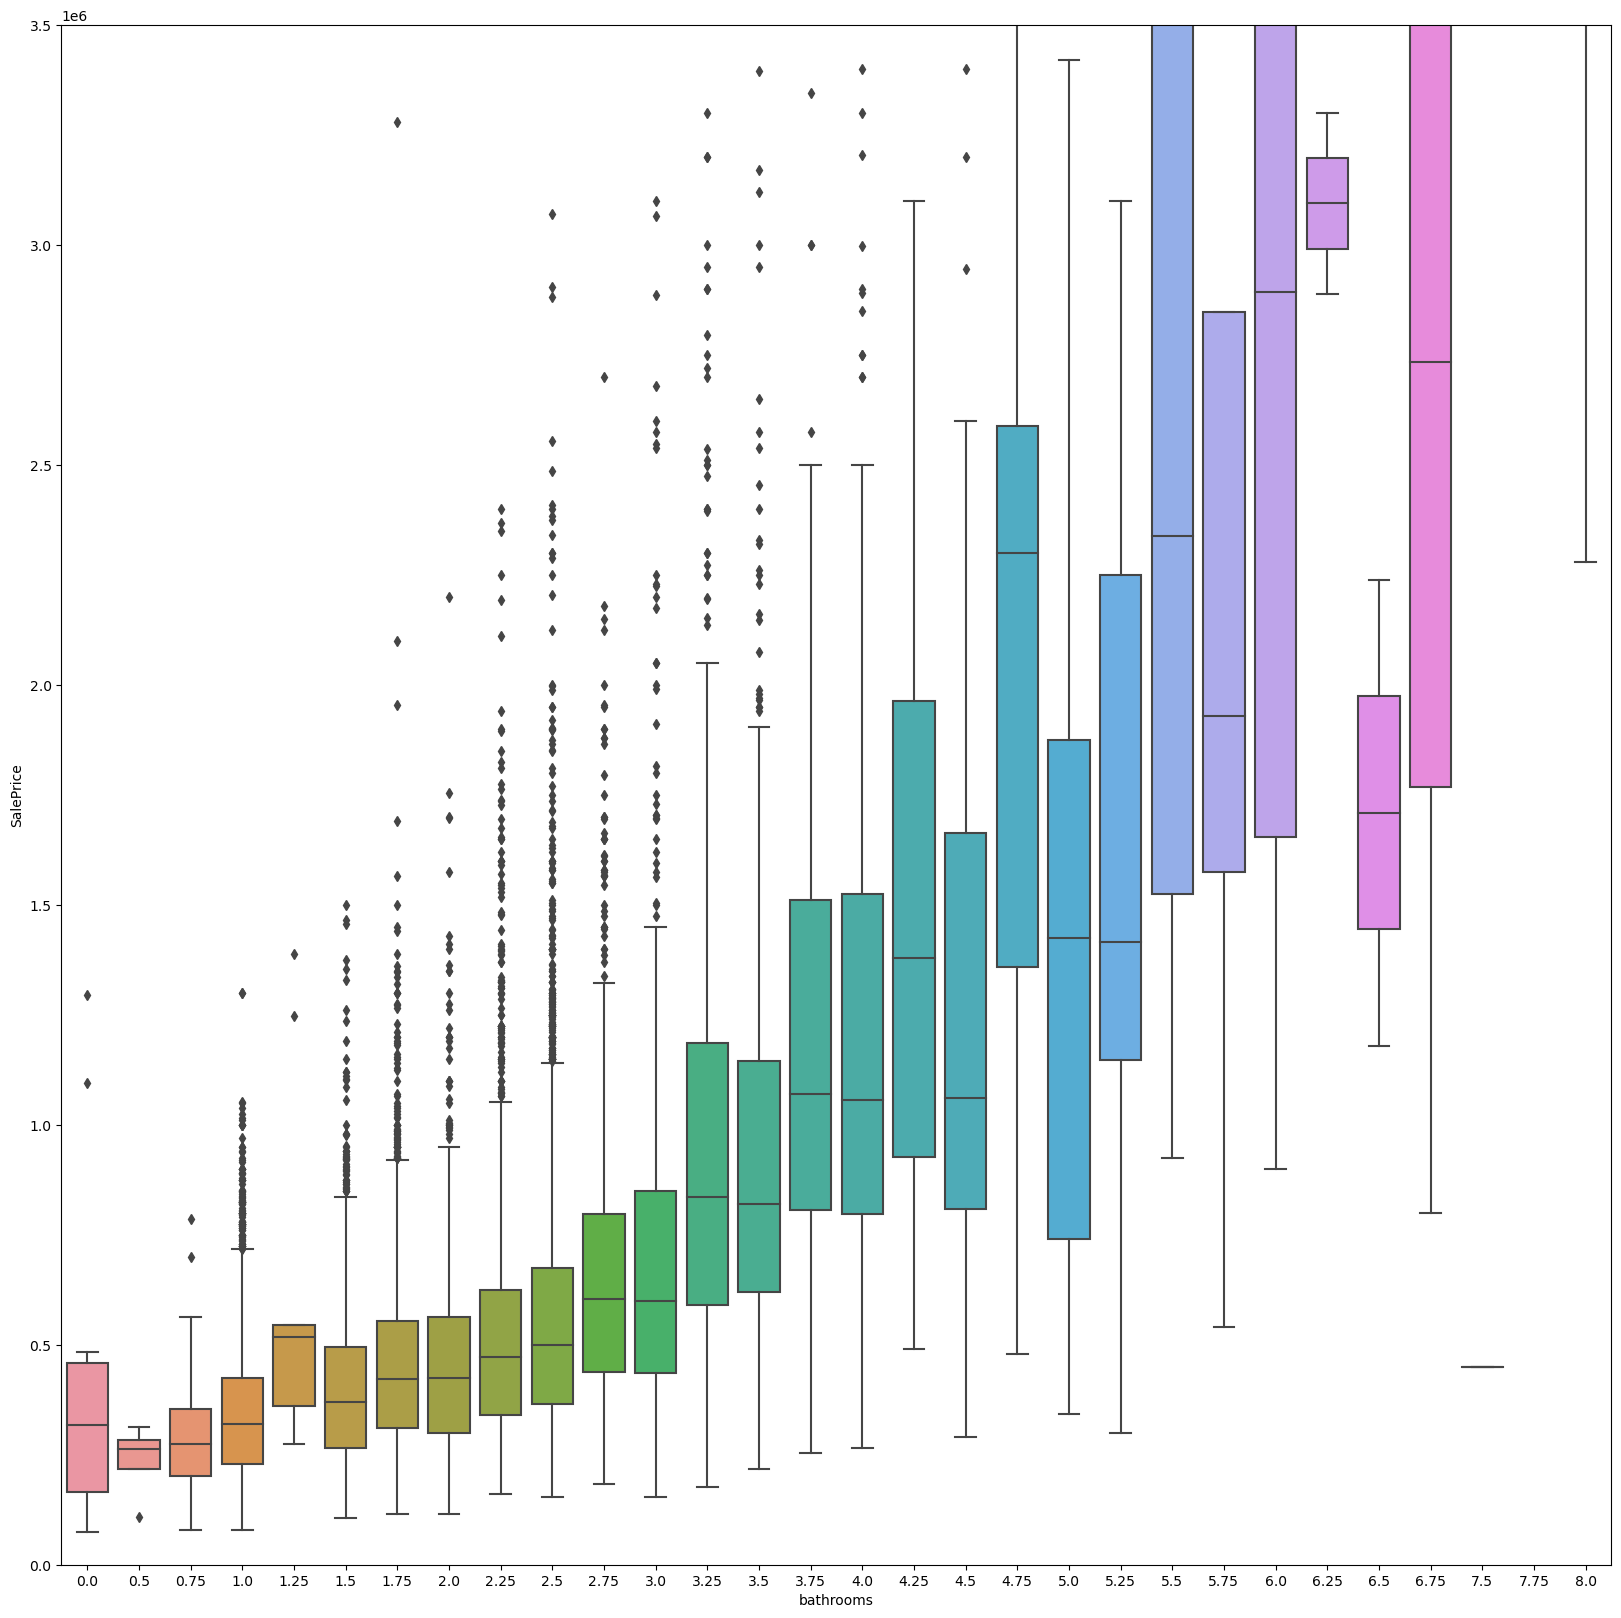

In [13]:
var = 'bathrooms'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f,ax = plt.subplots(figsize=(20,20))
fig = sns.boxplot(x=var,y ='SalePrice',data=data)
fig.axis(ymin=0,ymax=3500000)

<Axes: xlabel='sqft_living', ylabel='SalePrice'>

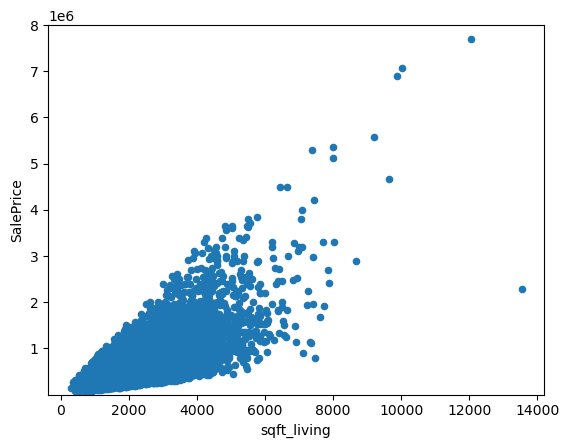

In [14]:
var = 'sqft_living'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x =var,y='SalePrice',ylim=(3,8000000))

(-0.5, 5.5, 0.0, 3500000.0)

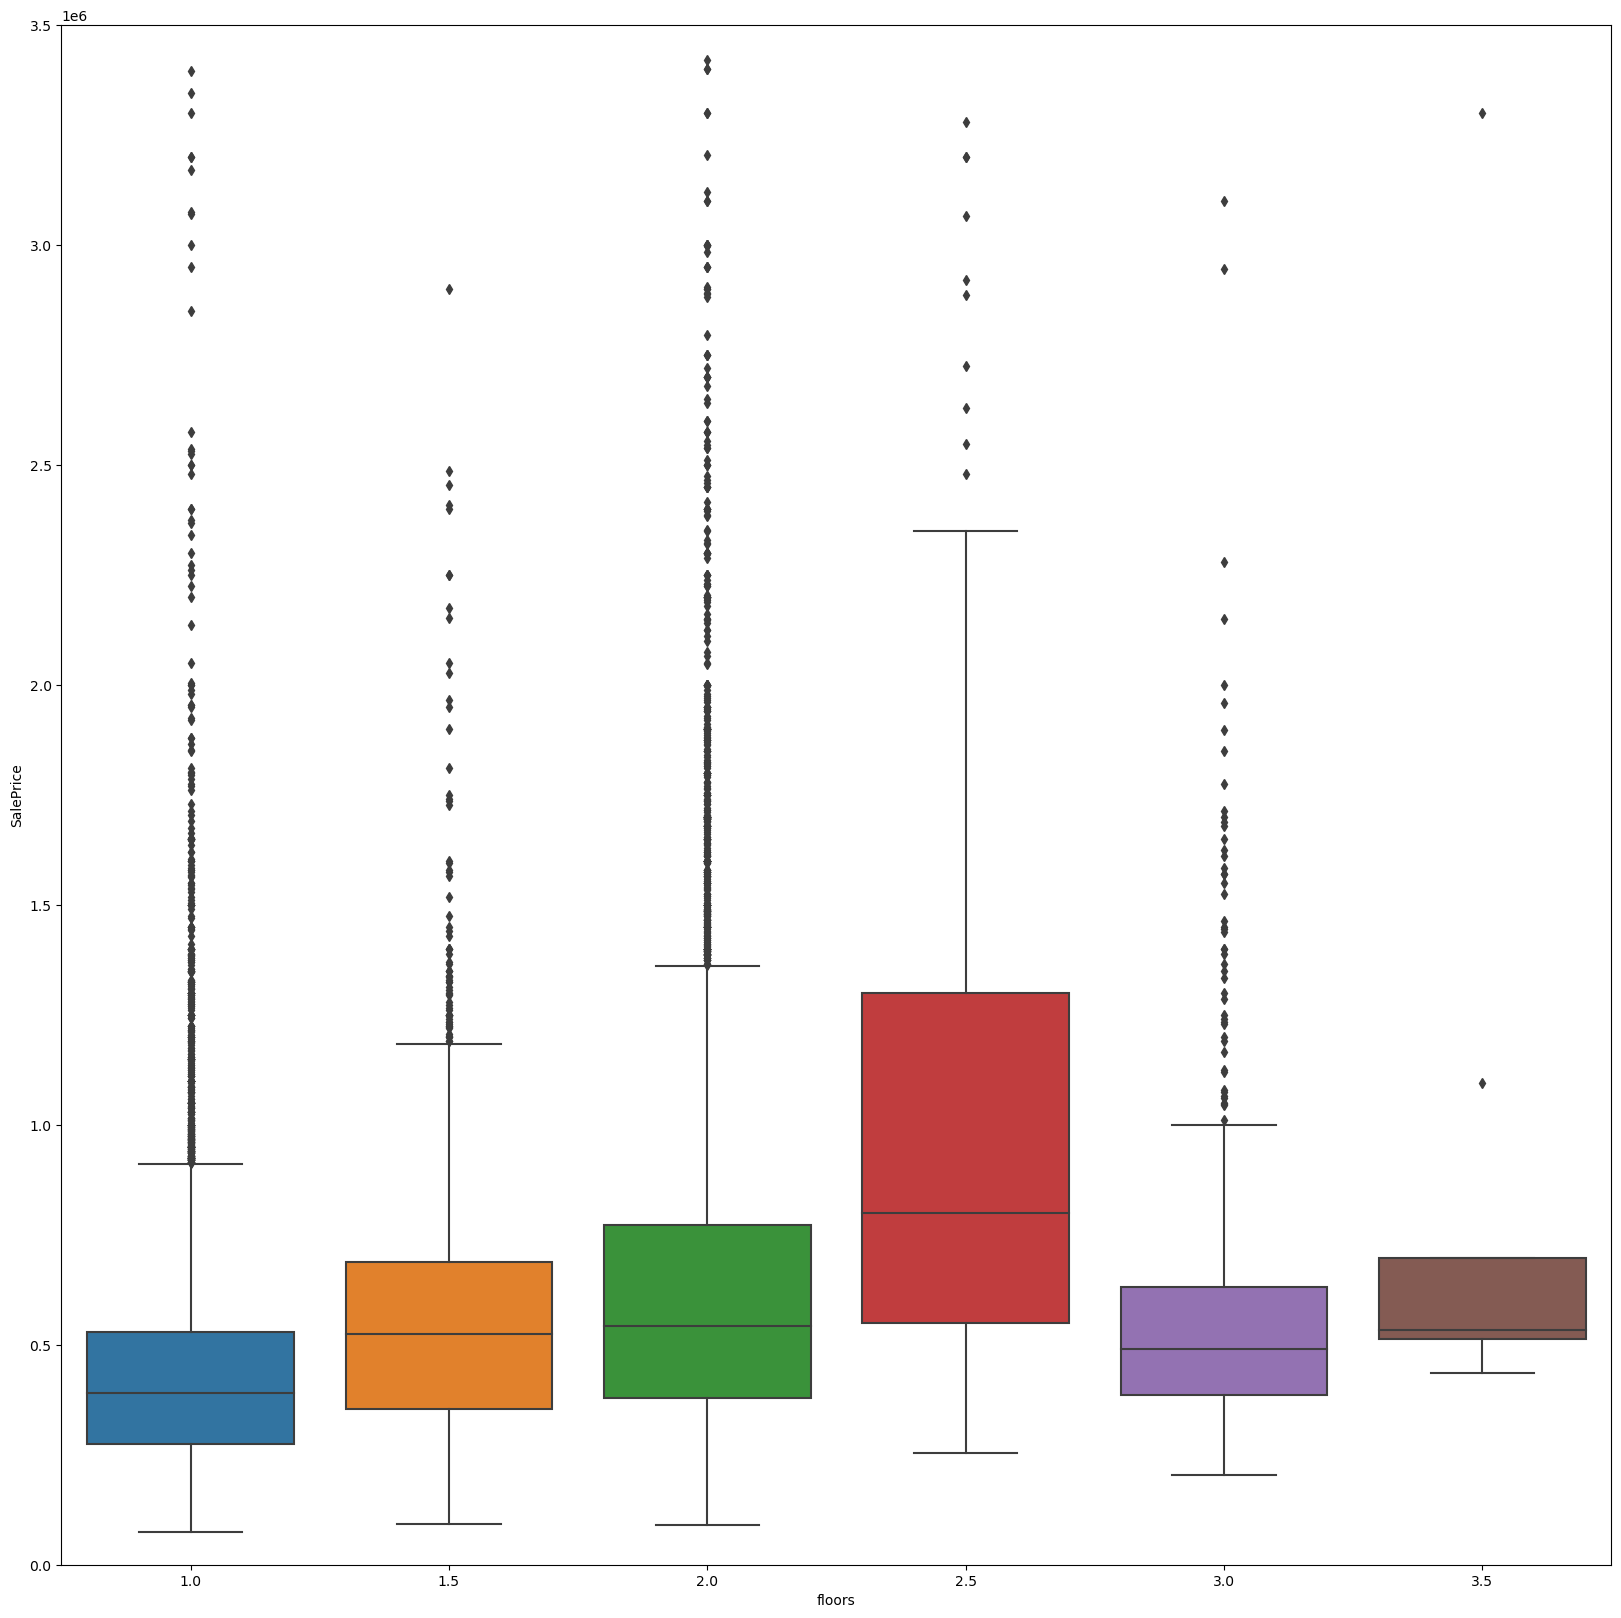

In [15]:
var = 'floors'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f,ax = plt.subplots(figsize=(20,20))
fig = sns.boxplot(x=var,y ='SalePrice',data=data)
fig.axis(ymin=0,ymax=3500000)

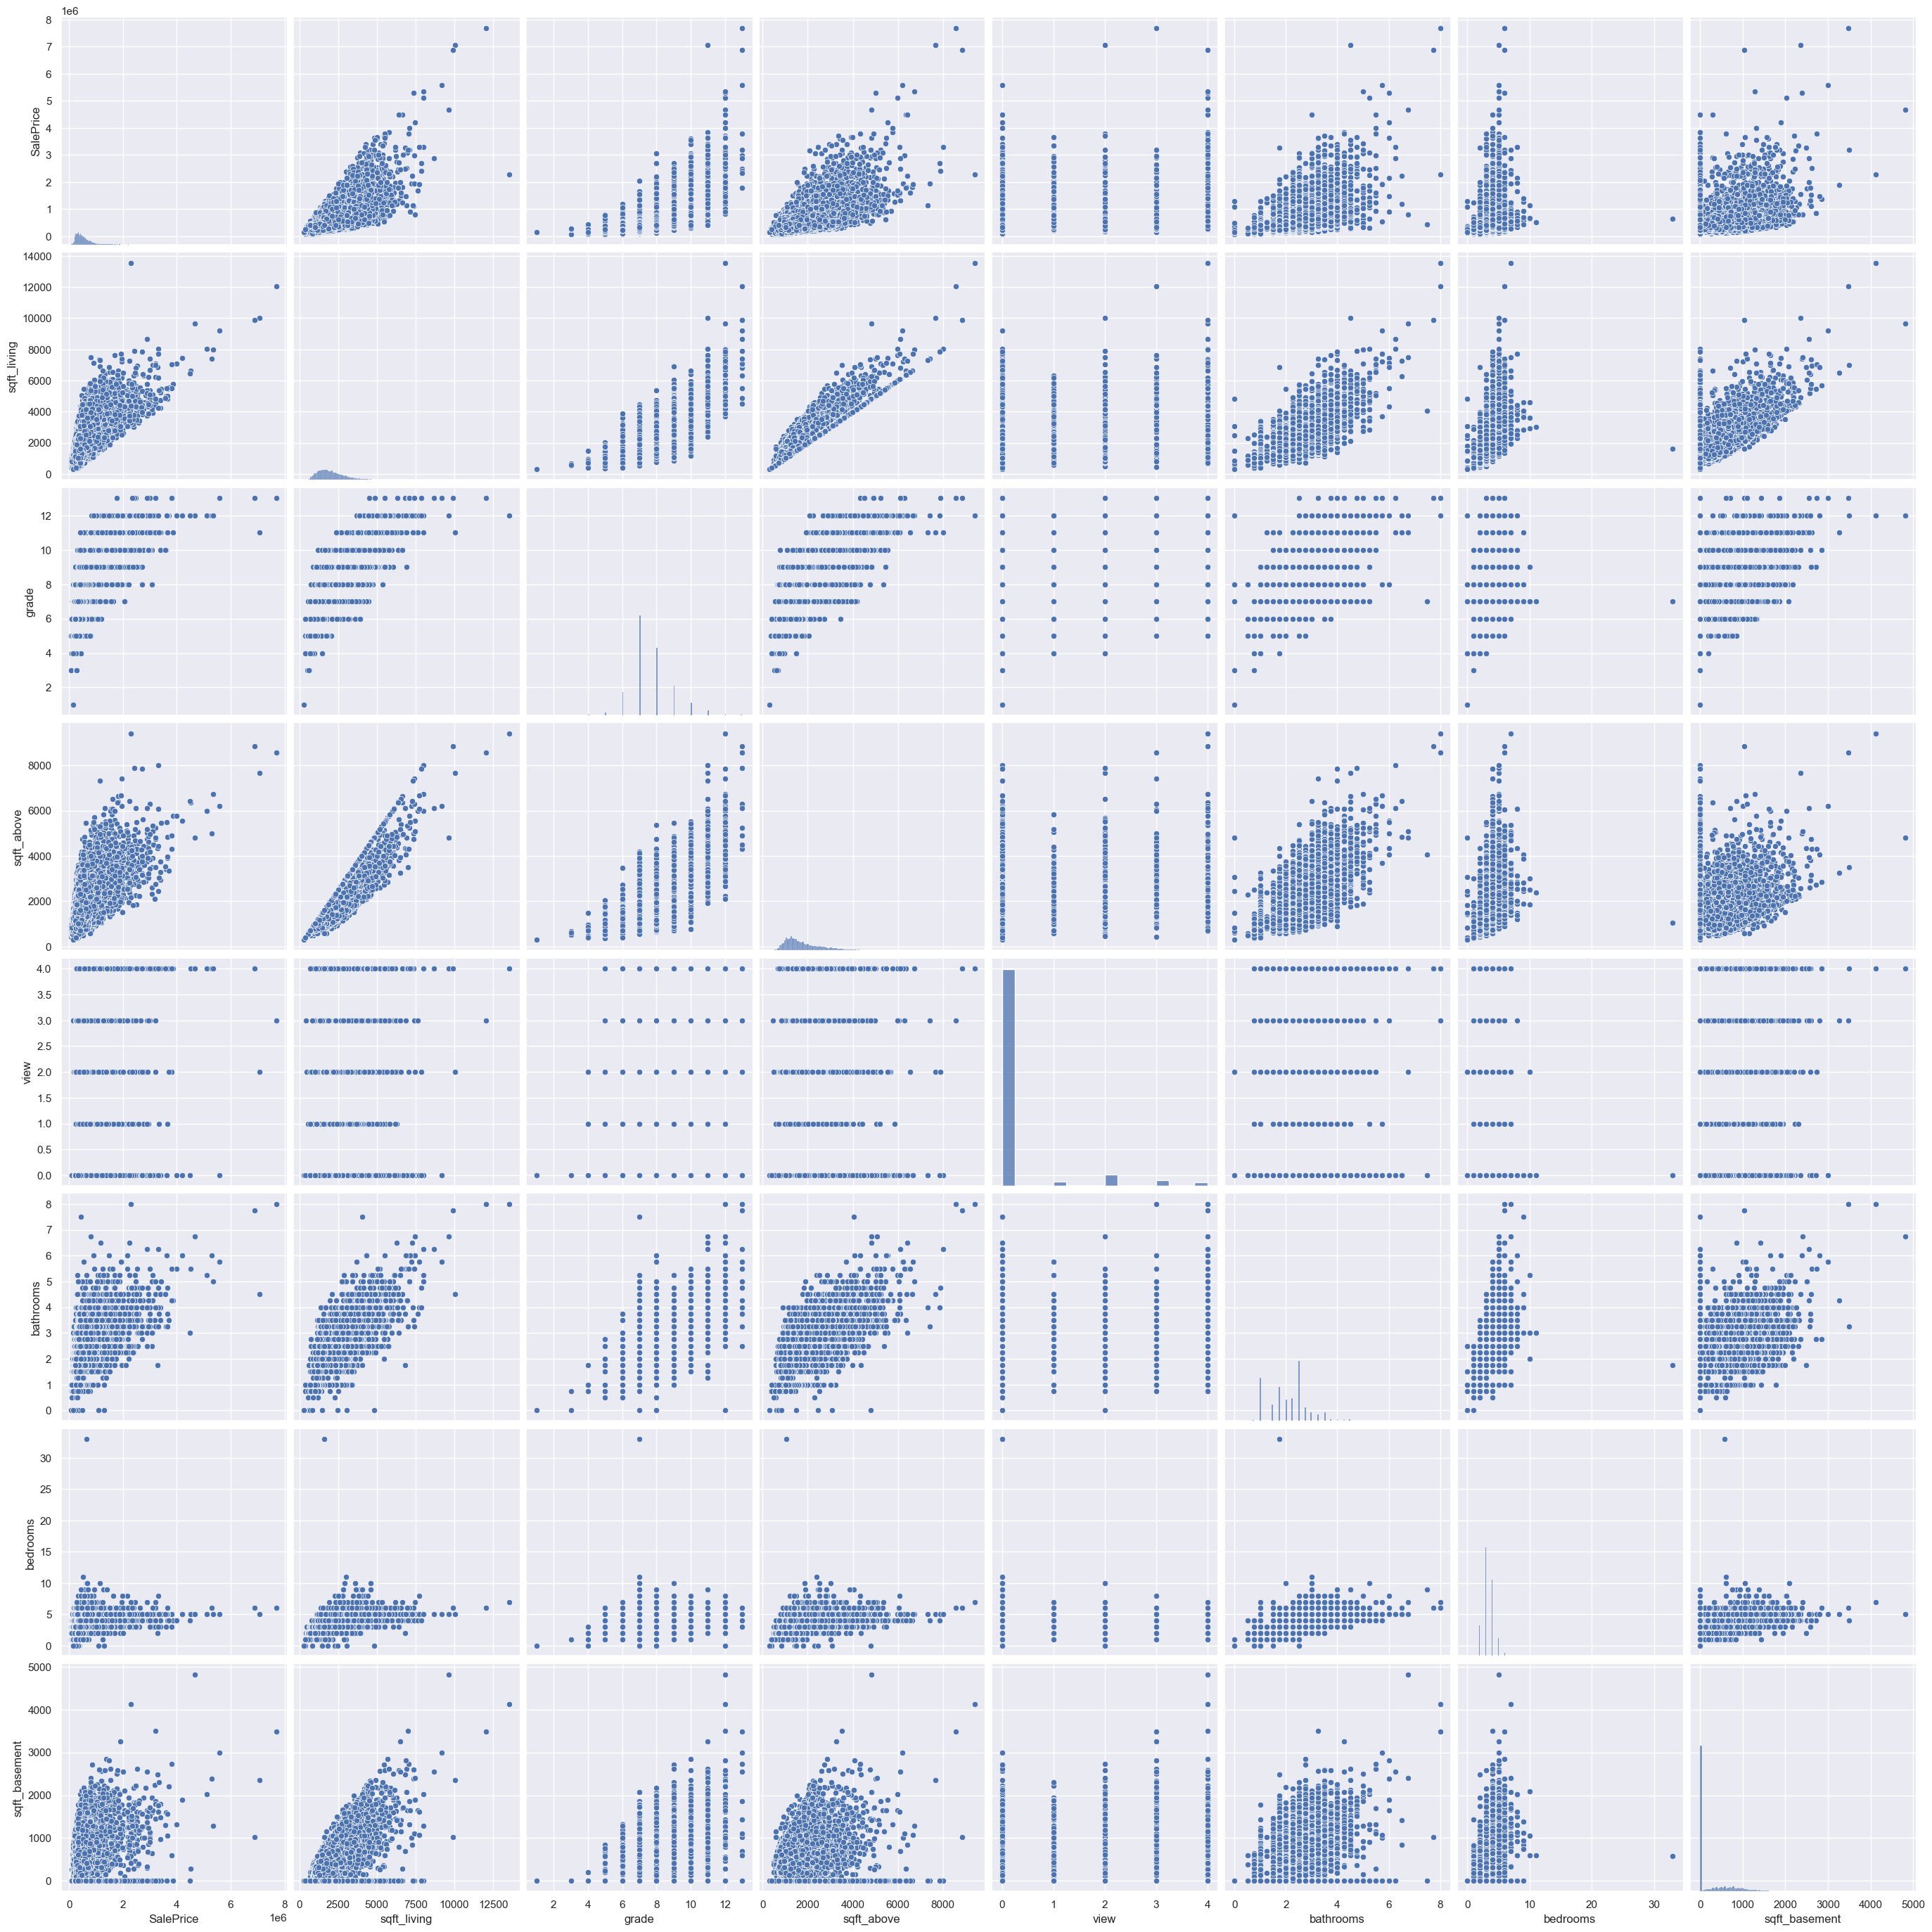

In [16]:
#Pairplots to visualize strong correlation
sns.set()
cols =['SalePrice','sqft_living','grade','sqft_above','view','bathrooms','bedrooms','sqft_basement']
sns.pairplot(df_train[cols],height=3.5)
plt.show()

In [17]:
df_train.dtypes

id                 int64
date              object
SalePrice        float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [18]:
filtered_data = df_train[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view','sqft_basement','waterfront','yr_built','lat','bedrooms','long']]

In [19]:
X = filtered_data.values
y = df_train.SalePrice.values

### Steps-5: Splitting data into training and testing set

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### AdaBoost Regression

In [21]:
adaboost = AdaBoostRegressor(n_estimators=50,learning_rate=0.2,loss='exponential').fit(X_train,y_train)
predict = adaboost.predict(X_test)
r2score= r2_score(predict,y_test)

In [22]:
#Calculating R2 score
r2score

0.48708328355802133

In [23]:
#Calculating Mean Squared Error and Root Mean Squared Error
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predict)
rmse = math.sqrt(mse)
print(rmse)

211734.72664288554


### Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor().fit(X_train,y_train)
pred = gbm.predict(X_test)
r2score = r2_score(pred,y_test)

In [27]:
#Calculating r2 score
r2score

0.8435768445361127

In [29]:
#Calculating the mean squared error
mse = mean_squared_error(y_test,pred)
rmse = math.sqrt(mse)
print(rmse)

132918.33919561713


### XG boost

In [30]:
from xgboost import XGBRegressor

In [31]:
xgb_reg = XGBRegressor(n_jobs=-1)
xgb_reg.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [32]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
y_pred = xgb_reg.predict(X_test)
r2score = r2_score(y_test,y_pred)
r2score

0.8872304225924754

In [34]:
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)

In [35]:
rmse

125833.0940036305

### Hyper parameter tuning

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[100,200,500,750],
    'learning_rate':[0.01,0.02,0.05,0.1,0.25],
    'min_child_weight':[1,5,7,10],
    'gamma':[0.1,0.5,1,1.5,5],
    'subsample':[0.6,0.8,1.0],
    'colsample_bytree':[0.6,0.8,1.0],
    'max_depth':[3,4,5,10,12]
}

folds = 3
# param_comb = 800
random_search = RandomizedSearchCV(xgb_reg,param_distributions=params,n_jobs=-1,cv=5,verbose=1)

In [39]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 750],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=1)

In [41]:
xgb_hpt = random_search.best_estimator_
xgb_hpt.fit(X_train,y_train)
pred_hpt = xgb_hpt.predict(X_test)
r2_score(y_test,pred_hpt)

0.8881315206740685

In [42]:
mse = mean_squared_error(y_test,pred_hpt)
rmse = math.sqrt(mse)

In [43]:
rmse

125329.3438718378